In [1]:
import osmium
import shapely.wkb as wkblib
#import osmnx as ox
import geopandas
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import random

In [2]:
from pipeline.climate_zones import get_climate_zones
from pipeline.buildings import create_geodataframe
#get_climate_zones()
geodf = create_geodataframe('pipeline/denmark-latest.osm.pbf')

Loading osm-data from file pipeline/denmark-latest.osm.pbf, this will take a while...
invalid area (area_id=1967296940)
invalid area (area_id=31424387)
Creating geodataframe from the data from pipeline/denmark-latest.osm.pbf, this will take a while...


In [3]:
from pipeline.level_estimation import predict_levels_with_knn, predict_levels_with_randomforest
geodf = predict_levels_with_knn(geodf,3)

In [4]:
geodf

,w_id,geometry,building:levels,levels,predicted
0,9.574528e+06,"MULTIPOLYGON (((1374821.960 7522195.247, 13748...",NaN,2.0,1.0
1,9.574574e+06,"MULTIPOLYGON (((1375072.552 7521768.787, 13750...",NaN,2.0,1.0
2,9.574576e+06,"MULTIPOLYGON (((1375001.274 7521759.991, 13750...",NaN,2.0,1.0
3,9.743352e+06,"MULTIPOLYGON (((1368708.528 7544171.847, 13689...",NaN,2.0,1.0
4,2.862015e+07,"MULTIPOLYGON (((1399616.329 7492660.880, 13996...",11.0,11.0,0.0
...,...,...,...,...,...
105695,2.327818e+09,"MULTIPOLYGON (((1324582.283 7364069.655, 13245...",NaN,1.0,1.0
105696,2.327818e+09,"MULTIPOLYGON (((1324620.377 7364090.117, 13246...",NaN,1.0,1.0
105697,2.327818e+09,"MULTIPOLYGON (((1324593.115 7364100.076, 13245...",NaN,1.0,1.0
105698,2.327818e+09,"MULTIPOLYGON (((1324634.514 7364128.342, 13246...",NaN,1.0,1.0


In [81]:
result = predict_levels_with_randomforest(geodf)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [5]:
geodf['area'] = geodf.area

In [6]:
geodf['floorarea'] = geodf.area * geodf['levels']

In [7]:
geodf

,w_id,geometry,building:levels,levels,predicted,area,floorarea
0,9.574528e+06,"MULTIPOLYGON (((1374821.960 7522195.247, 13748...",NaN,2.0,1.0,18495.816162,36991.632323
1,9.574574e+06,"MULTIPOLYGON (((1375072.552 7521768.787, 13750...",NaN,2.0,1.0,1596.418006,3192.836012
2,9.574576e+06,"MULTIPOLYGON (((1375001.274 7521759.991, 13750...",NaN,2.0,1.0,1477.999638,2955.999275
3,9.743352e+06,"MULTIPOLYGON (((1368708.528 7544171.847, 13689...",NaN,2.0,1.0,23789.092276,47578.184551
4,2.862015e+07,"MULTIPOLYGON (((1399616.329 7492660.880, 13996...",11.0,11.0,0.0,9068.756851,99756.325366
...,...,...,...,...,...,...,...
105695,2.327818e+09,"MULTIPOLYGON (((1324582.283 7364069.655, 13245...",NaN,1.0,1.0,34.983729,34.983729
105696,2.327818e+09,"MULTIPOLYGON (((1324620.377 7364090.117, 13246...",NaN,1.0,1.0,38.133088,38.133088
105697,2.327818e+09,"MULTIPOLYGON (((1324593.115 7364100.076, 13245...",NaN,1.0,1.0,34.830427,34.830427
105698,2.327818e+09,"MULTIPOLYGON (((1324634.514 7364128.342, 13246...",NaN,1.0,1.0,37.019869,37.019869


In [9]:
#loading european climate zones:
zones = get_climate_zones()

<Axes: >

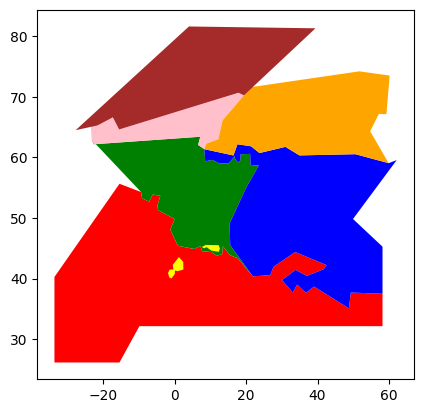

In [10]:
zones.plot(color=['red', 'green', 'blue', 'yellow', 'yellow', 'pink', 'orange', 'brown', 'beige'])

In [13]:
#needs speeding up
from pipeline.energy_demand import get_energy_demand
geodf2 = get_energy_demand(geodf, zones)

In [21]:
co2rates = pd.read_csv('co2rates.csv', index_col=0)

In [25]:
from pipeline.co2_emissions3 import get_co2_emissions
geodf3 = get_co2_emissions(geodf, co2rates)

In [26]:
geodf3

,w_id,geometry,building:levels,levels,predicted,area,floorarea,kWh/a,country,co2/a
0,9.574528e+06,"MULTIPOLYGON (((1374821.960 7522195.247, 13748...",NaN,2.0,1.0,18495.816162,36991.632323,4.930245e+06,denmark,8.220371e+05
1,9.574574e+06,"MULTIPOLYGON (((1375072.552 7521768.787, 13750...",NaN,2.0,1.0,1596.418006,3192.836012,4.255412e+05,denmark,7.095198e+04
2,9.574576e+06,"MULTIPOLYGON (((1375001.274 7521759.991, 13750...",NaN,2.0,1.0,1477.999638,2955.999275,3.939756e+05,denmark,6.568894e+04
3,9.743352e+06,"MULTIPOLYGON (((1368708.528 7544171.847, 13689...",NaN,2.0,1.0,23789.092276,47578.184551,6.341220e+06,denmark,1.057294e+06
4,2.862015e+07,"MULTIPOLYGON (((1399616.329 7492660.880, 13996...",11.0,11.0,0.0,9068.756851,99756.325366,1.329552e+07,denmark,2.216809e+06
...,...,...,...,...,...,...,...,...,...,...
105695,2.327818e+09,"MULTIPOLYGON (((1324582.283 7364069.655, 13245...",NaN,1.0,1.0,34.983729,34.983729,4.662631e+03,denmark,7.774170e+02
105696,2.327818e+09,"MULTIPOLYGON (((1324620.377 7364090.117, 13246...",NaN,1.0,1.0,38.133088,38.133088,5.082378e+03,denmark,8.474028e+02
105697,2.327818e+09,"MULTIPOLYGON (((1324593.115 7364100.076, 13245...",NaN,1.0,1.0,34.830427,34.830427,4.642199e+03,denmark,7.740103e+02
105698,2.327818e+09,"MULTIPOLYGON (((1324634.514 7364128.342, 13246...",NaN,1.0,1.0,37.019869,37.019869,4.934008e+03,denmark,8.226646e+02


In [32]:
geodf3

,w_id,geometry,building:levels,levels,predicted,area,floorarea,kWh/a,country,co2/a,opt_co2,diff
0,9.574528e+06,"MULTIPOLYGON (((1374821.960 7522195.247, 13748...",NaN,2.0,1.0,18495.816162,36991.632323,4.930245e+06,denmark,8.220371e+05,5.702217e+05,251815.449938
1,9.574574e+06,"MULTIPOLYGON (((1375072.552 7521768.787, 13750...",NaN,2.0,1.0,1596.418006,3192.836012,4.255412e+05,denmark,7.095198e+04,4.921719e+04,21734.792070
2,9.574576e+06,"MULTIPOLYGON (((1375001.274 7521759.991, 13750...",NaN,2.0,1.0,1477.999638,2955.999275,3.939756e+05,denmark,6.568894e+04,4.556638e+04,20122.558556
3,9.743352e+06,"MULTIPOLYGON (((1368708.528 7544171.847, 13689...",NaN,2.0,1.0,23789.092276,47578.184551,6.341220e+06,denmark,1.057294e+06,7.334121e+05,323881.948361
4,2.862015e+07,"MULTIPOLYGON (((1399616.329 7492660.880, 13996...",11.0,11.0,0.0,9068.756851,99756.325366,1.329552e+07,denmark,2.216809e+06,1.537732e+06,679077.466401
...,...,...,...,...,...,...,...,...,...,...,...,...
105695,2.327818e+09,"MULTIPOLYGON (((1324582.283 7364069.655, 13245...",NaN,1.0,1.0,34.983729,34.983729,4.662631e+03,denmark,7.774170e+02,5.392701e+02,238.146924
105696,2.327818e+09,"MULTIPOLYGON (((1324620.377 7364090.117, 13246...",NaN,1.0,1.0,38.133088,38.133088,5.082378e+03,denmark,8.474028e+02,5.878171e+02,259.585753
105697,2.327818e+09,"MULTIPOLYGON (((1324593.115 7364100.076, 13245...",NaN,1.0,1.0,34.830427,34.830427,4.642199e+03,denmark,7.740103e+02,5.369069e+02,237.103343
105698,2.327818e+09,"MULTIPOLYGON (((1324634.514 7364128.342, 13246...",NaN,1.0,1.0,37.019869,37.019869,4.934008e+03,denmark,8.226646e+02,5.706569e+02,252.007667


In [35]:
minx, miny, maxx, maxy = geodf3.to_crs('4326').total_bounds
print(minx, miny, maxx, maxy)

8.0831993 54.559536 15.189948199999996 57.74740179999999


In [36]:
copenhagen = geodf3.to_crs('4326').cx[12.53:12.60,55.67:55.70]

<Axes: >

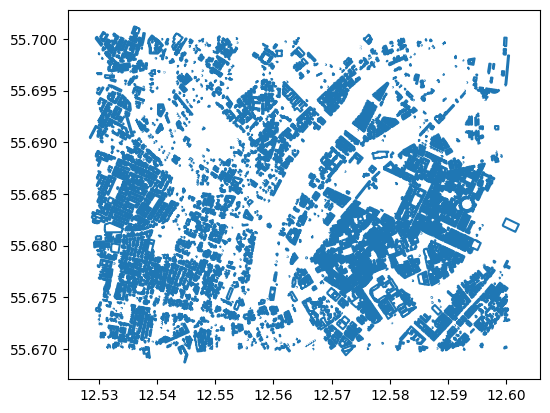

In [37]:
copenhagen.boundary.plot()

In [38]:
copenhagen.to_file('copenhagen')

/tmp/ipykernel_52565/4094666367.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  copenhagen.to_file('copenhagen')


In [43]:
helsingor = geodf3.to_crs('4326').cx[12.49:12.65,56.00:56.07]

<Axes: >

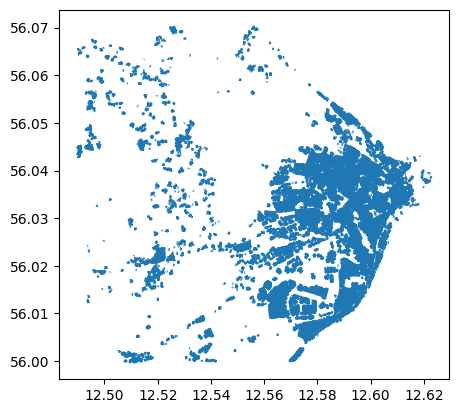

In [44]:
helsingor.boundary.plot()

In [47]:
copenhagen.shape

(9007, 12)

In [102]:
#creating a 2d array for all square tiles to cover the whole country (adding one for surity)
rows = int(np.floor((maxy - miny) / 1000))
cols = int(np.floor((maxx - minx) / 1000))
co2sums = np.zeros((rows+1,cols+1))

In [79]:
geodf['centroid'] = geodf.geometry.centroid

In [58]:
sqrs = geopandas.read_file('helsingor_squares_co2')

In [59]:
sqrs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [60]:
sqrs

,co2/a,geometry
0,1.869057e+05,"POLYGON ((12.49868 55.99970, 12.49868 56.00472..."
1,2.400682e+06,"POLYGON ((12.50766 55.99970, 12.50766 56.00472..."
2,3.253472e+05,"POLYGON ((12.51664 55.99970, 12.51664 56.00472..."
3,5.286790e+05,"POLYGON ((12.52563 55.99970, 12.52563 56.00472..."
4,1.558656e+06,"POLYGON ((12.53461 55.99970, 12.53461 56.00472..."
...,...,...
143,1.001257e+05,"POLYGON ((12.54359 56.06495, 12.54359 56.06996..."
144,6.272201e+05,"POLYGON ((12.55258 56.06495, 12.55258 56.06996..."
145,5.112352e+04,"POLYGON ((12.56156 56.06495, 12.56156 56.06996..."
146,2.128109e+04,"POLYGON ((12.51664 56.06996, 12.51664 56.07498..."


<Axes: >

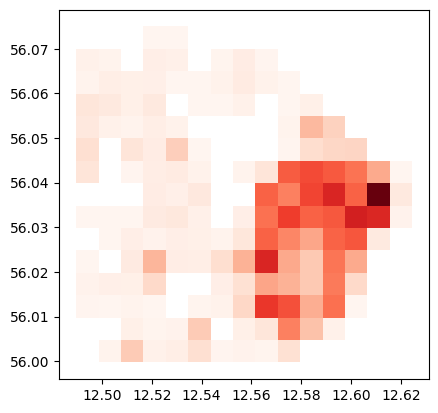

In [66]:
sqrs.plot(column=sqrs['co2/a'], cmap='Reds')

In [103]:
#summing up co2 for every row in the dataframe to the correct square tile in the grid
for index, row in geodf.iterrows():
    co2sums[int(np.floor((row.centroid.y-miny)/1000))][int(np.floor((row.centroid.x-minx)/1000))] += row.co2
    

In [111]:
squares = []
sums = []
for y in range(0, co2sums.shape[0]):
    for x in range(0, co2sums.shape[1]):
        co2 = co2sums[y,x]
        if co2 > 0:
            thisx = minx + x*1000
            thisy = miny + y*1000
            lon_point_list = [thisx, thisx+1000, thisx+1000, thisx, thisx]
            lat_point_list = [thisy, thisy, thisy+1000, thisy+1000, thisy]
            squares.append(Polygon(zip(lon_point_list, lat_point_list)))
            sums.append(co2)

In [115]:
sqdf = geopandas.GeoDataFrame(crs=geodf.crs, geometry=squares)
sqdf['co2'] = sums

In [159]:
#normalizing between 0 and 1
sqdf['co2n'] = sqdf.co2/sqdf.co2.max()

<Axes: >

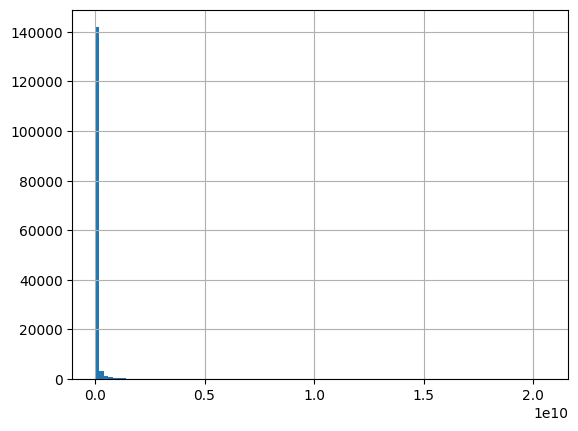

In [178]:
#not a very balanced data set
sqdf.co2.hist(bins=100)

<Axes: >

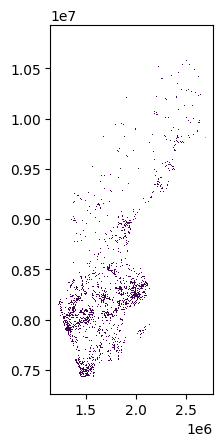

In [125]:
sqdf.plot(column=sqdf.co2n)

In [165]:
for_shape_file = sqdf.copy().cx[0:2250000, 7750000:8250000]

In [179]:
for_shape_file.co2n = for_shape_file.co2 / for_shape_file.co2.max()

In [183]:
for_shape_file.to_file('mid_swe_square_tiles')

In [ ]:
#saving it to postgis-database
from sqlalchemy import create_engine
engine = create_engine("postgresql://")  
geodf[10001:20000].to_postgis("swedtest2", engine, if_exists='append')

In [185]:
geodf
save = geodf.filter(items=['w_id', 'geometry', 'new_level', 'area', 'floorarea', 'kwh', 'co2'], axis=1)

In [187]:
save.to_file('swe_co2')

In [157]:
save[:10000].to_file('save')